## 데이터 분석 실습 (지그재그)

In [103]:
import pandas as pd
import numpy as np
import sqlite3

### 데이터 불러오기

In [104]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#### 1. zigzag_DB.db에서 데이터베이스 스키마를 출력하고  order 테이블을 불러오기

In [105]:
connect = sqlite3.connect("data/zigzag_DB.db")
connect

In [106]:
query = "SELECT * FROM sqlite_master"

schema = pd.read_sql(query, connect)
schema

,type,name,tbl_name,rootpage,sql
0,table,order,order,3142,"CREATE TABLE ""order"" (\n""timestamp"" TEXT,\n ""..."
1,table,good,good,2,"CREATE TABLE ""good"" (\n""goods_id"" INTEGER,\n ..."
2,table,shop,shop,10,"CREATE TABLE ""shop"" (\n""shop_id"" INTEGER,\n ""..."
3,table,log,log,121,"CREATE TABLE ""log"" (\n""timestamp"" TEXT,\n ""us..."
4,table,user,user,18,"CREATE TABLE ""user"" (\n""user_id"" TEXT,\n ""os""..."


In [107]:
query = "SELECT * FROM 'order'"

order = pd.read_sql(query, connect)
order.head()

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


#### 2. order 테이블을 이용해 매출 상위 10개 구하기

In [108]:
order.head()

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


In [109]:
table = pd.pivot_table(order, values="price", index="shop_id", aggfunc="sum")

table.sort_values("price", ascending=False).head(10)

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


#### 3. 판매 건수를 포함하여 피벗테이블을 만들고 상위 10개 쇼핑몰의 매출을 막대그래프로 표현

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# 주피터 노트북에서 그래프가 표시되도록 하는 것
%matplotlib inline

%config InlineBackend.figure_format = 'retina' 

In [111]:
table = pd.pivot_table(order, index="shop_id", values="price", aggfunc=["sum", "count"])

table.columns = ["sum", "count"]
table = table.sort_values("sum", ascending=False).head(10)
table

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


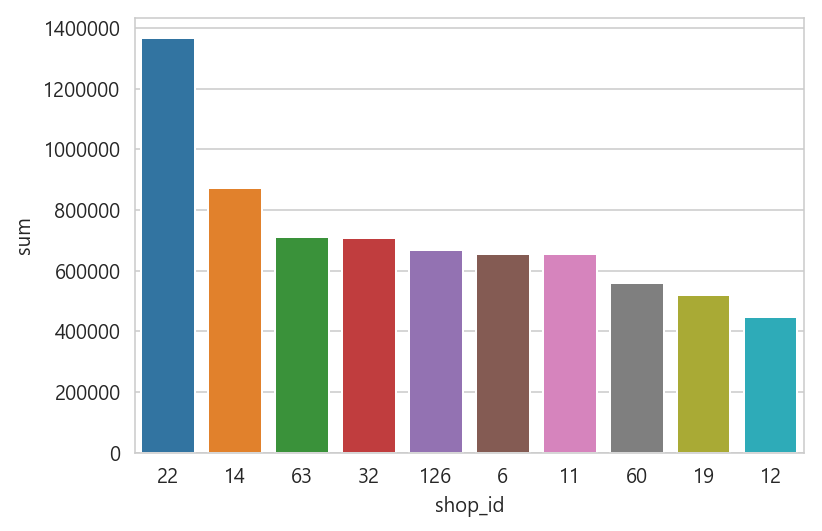

In [112]:
sns.barplot(data=table, x=table.index, y="sum", order=table.index)

#### 4. 시간대별 지그재그 매출을 구하고 lineplot을 이용하여 시간대별 매출을 시각화

In [113]:
import matplotlib as mpl
sns.set_style('whitegrid')

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [114]:
order.head()

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


In [115]:
order["timestamp"] = pd.to_datetime(order["timestamp"])
order["timestamp"].head()

0   2018-06-11 00:00:43.032
1   2018-06-11 00:02:33.763
2   2018-06-11 00:04:06.364
3   2018-06-11 00:04:17.258
4   2018-06-11 00:05:26.010
Name: timestamp, dtype: datetime64[ns]

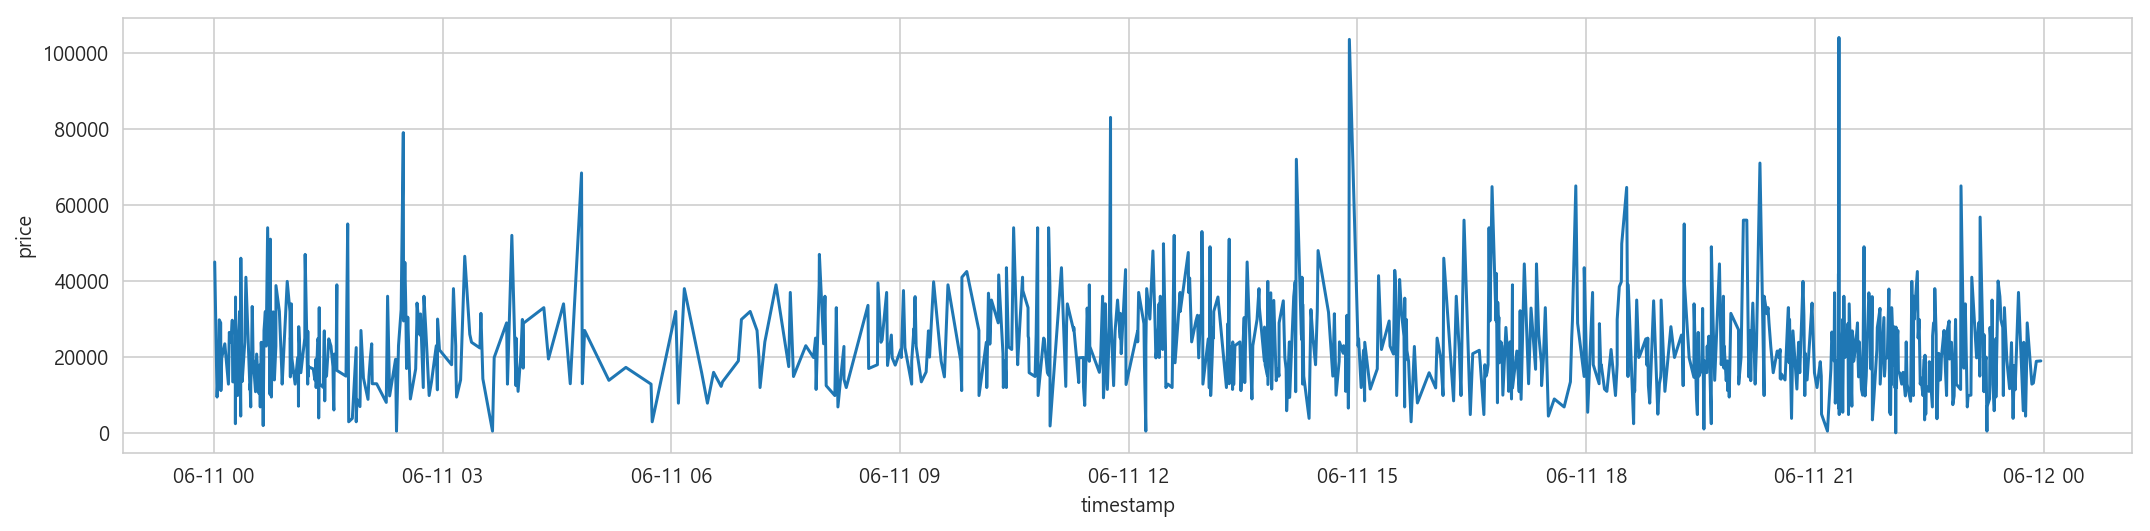

In [116]:
plt.figure(figsize=(18,4))

sns.lineplot(data=order, x="timestamp", y="price")

#### 5. 구간화(binning)

In [117]:
order["hour"] = order["timestamp"].dt.hour
order["hour"].head()

0    0
1    0
2    0
3    0
4    0
Name: hour, dtype: int64

In [118]:
binning = pd.pivot_table(order, values="price", index="hour", aggfunc="sum")

binning.head()

,price
hour,
0,1479210
1,990300
2,787830
3,467650
4,304800


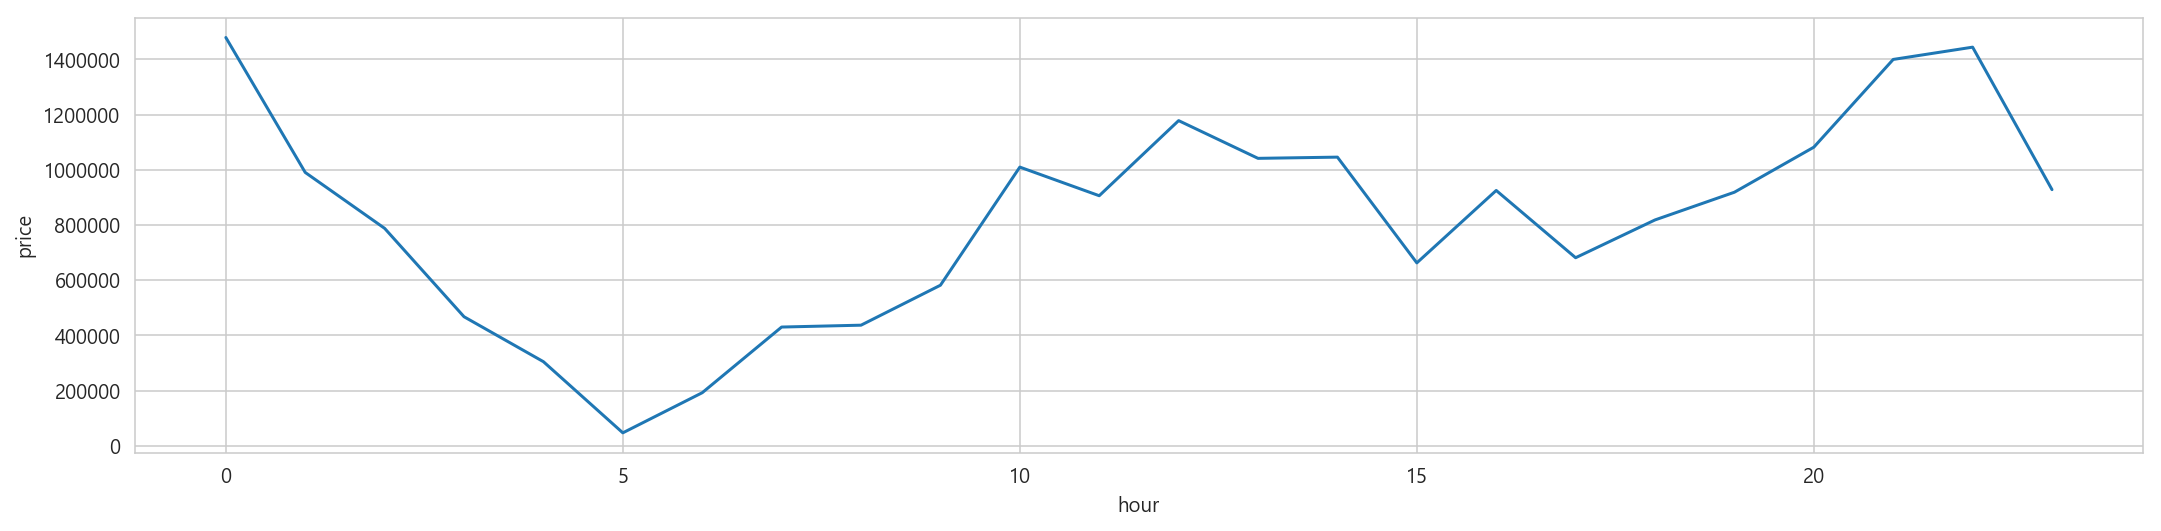

In [119]:
plt.figure(figsize=(18,4))

sns.lineplot(data=binning, x=binning.index, y="price")

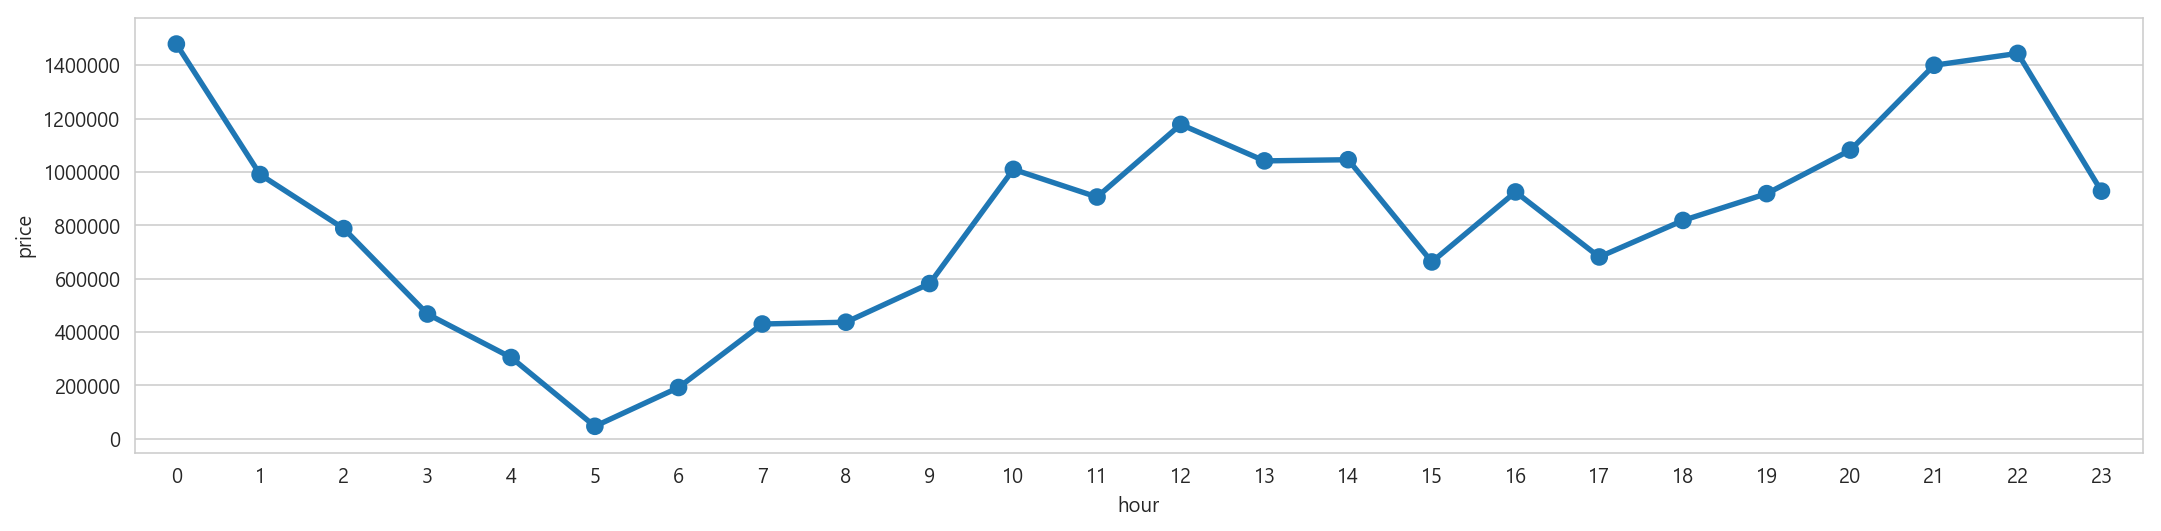

In [120]:
plt.figure(figsize=(18,4))

sns.pointplot(data=binning, x=binning.index, y="price")

#### 6 . user 테이블과 order 테이블을 병합

In [121]:
query = "SELECT * FROM 'user'"

user = pd.read_sql(query, connect)

print(user.shape)
user.head()

(10000, 3)


,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [122]:
order.head()

,timestamp,user_id,goods_id,shop_id,price,hour
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0


In [123]:
order_user = pd.merge(order, user, on="user_id")
order_user.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17


#### 7. 매출 Top 10 쇼핑몰 구매자들의 연령대를 쇼핑몰별로 시각화

나이 정보가 없는 경우는 -1이 입력되어 있기 때문에 이를 처리한 다음 시각화

In [124]:
# Top 10 쇼핑몰 리스트
top10_index = table.index
top10_index

Int64Index([22, 14, 63, 32, 126, 6, 11, 60, 19, 12], dtype='int64', name='shop_id')

In [125]:
# Top 10 쇼핑몰이 포함된 리스트
top10_shop = order_user["shop_id"].isin(top10_index)

# 나이가 -1 아닌 나이 정리
top10_age = order_user["age"] != -1

merged_top10 = order_user[top10_shop & top10_age]
merged_top10.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
5,2018-06-11 00:05:35.182,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,55,22,11200,0,iOS,21
6,2018-06-11 00:06:14.314,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,2451,22,19800,0,iOS,22
7,2018-06-11 00:08:39.716,LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl,4278,60,23500,0,iOS,24
9,2018-06-11 00:11:30.954,Evz6xmsye1BP7i33rr_RAjwBRZ_AOsTZ,686,22,12900,0,And,27


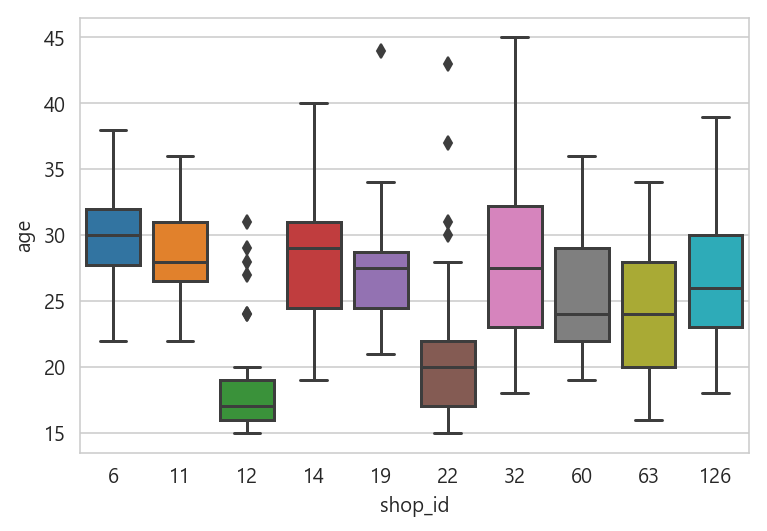

In [126]:
sns.boxplot(data=merged_top10, x="shop_id", y="age")

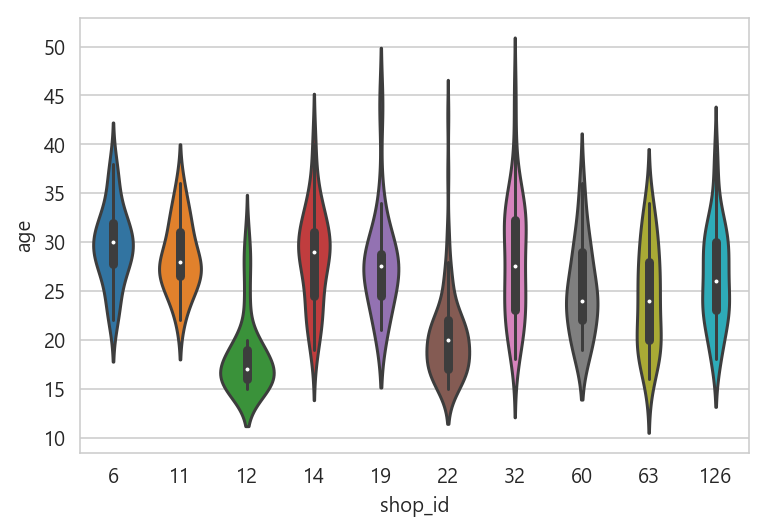

In [127]:
sns.violinplot(data=merged_top10, x="shop_id", y="age")

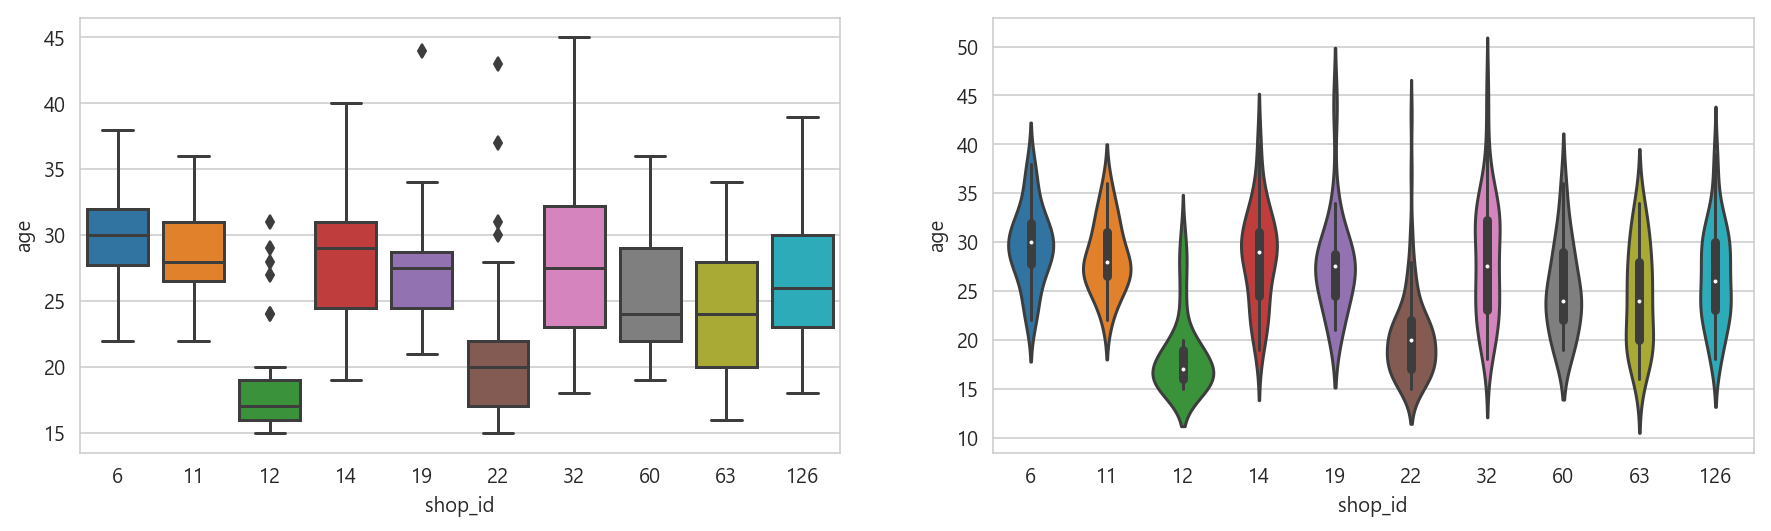

In [128]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15, 4)

sns.boxplot(data=merged_top10, x="shop_id", y="age", ax=ax1)
sns.violinplot(data=merged_top10, x="shop_id", y="age", ax=ax2)

#### 8. user 테이블에 연령대를 나타내는 칼럼생성 후쇼핑몰이 설정한 타겟 연령대와 실제로 구매를 한 고객의 연령과 일치하는지를 검증

1. 실제 나이를 바탕으로 user 테이블에 연령대 칼럼을 만들기
2. shop 테이블을 불러와 user, order 테이블과 병합하기
3. 쇼핑몰의 타겟 연령대와 해당 쇼핑몰에서의 결제를 한 고객의 연령대를 비교하기

In [129]:
# // == 몫, % == 나머지
def make_generation(age):
    if age == -1:
        return '미입력'
    elif age // 10 >= 4:
        return "30대 후반"
    elif age // 10 == 1:
        return "10대"
    elif age % 10 < 3:
        return str(age // 10 * 10) + f"대 초반"
    elif age % 10 <= 6:
        return str(age // 10 * 10) + f"대 중반"
    else:
        return str(age // 10 * 10) + f"대 후반"

    
print(make_generation(10))
print(make_generation(23))
print(make_generation(29))
print(make_generation(32))
print(make_generation(35))
print(make_generation(40))

10대
20대 중반
20대 후반
30대 초반
30대 중반
30대 후반


In [130]:
user.head()

,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [131]:
user["연령대"] = user["age"].map(make_generation)

user["연령대"].head()

0    30대 후반
1    30대 초반
2       10대
3    30대 후반
4    30대 후반
Name: 연령대, dtype: object

In [132]:
user.head()

,user_id,os,age,연령대
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41,30대 후반
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31,30대 초반
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16,10대
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41,30대 후반
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42,30대 후반


shop 테이블을 DB에서 불러와서 user, order 테이블과 병합

In [133]:
query = "SELECT * FROM 'shop'"

shop = pd.read_sql(query, connect)
shop.head()

,shop_id,name,category,age,style
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


In [134]:
merged = pd.merge(order, user, on="user_id")

merged.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age,연령대
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1,미입력
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34,30대 중반
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17,10대


In [135]:
merged = pd.merge(merged, shop, on="shop_id")

merged.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직


In [136]:
def check_generation(row):
    if row['category'] == '의류' and row['연령대'] == '미입력':
        return True
    else:
        return row['연령대'] in str(row['age_y'])

In [137]:
merged["거래연령 일치여부"] = merged.apply(check_generation, axis=1)

merged["거래연령 일치여부"].head()

0    False
1     True
2    False
3     True
4     True
Name: 거래연령 일치여부, dtype: bool

In [138]:
table = merged.pivot_table(values="거래연령 일치여부", index="shop_id", aggfunc=['mean', 'count'])

table.head()

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
1,0.666667,3
2,0.937500,16
3,0.400000,5
4,1.000000,1
5,0.000000,1


In [139]:
#위의 정보를 Top 10 쇼핑몰에 대입
table[table.index.isin(top10_index)]

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
6,0.750000,24
11,0.684211,19
12,0.857143,42
14,0.566667,30
19,0.789474,19
22,0.929293,99
32,0.540541,37
60,0.695652,23


#### 9. 쇼핑몰의 스타일 태그 정리

In [140]:
# 쇼핑몰 리스트
style_list = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩',
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '펑키', '큐티', '볼드&에스닉' ]

In [141]:
for style in style_list:
    shop[f"{style}"] = shop["style"].str.contains(style)

In [142]:
shop.head()

,shop_id,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


#### 10. 스타일별 실제 구매 기록을 바탕으로 가장 구매가 많이 일어난 스타일 키워드 찾고 매출이 가장 많은 3가지 스타일의 구매 연령대 분포 그리기


In [143]:
merged = pd.merge(order, shop, on="shop_id")

merged.head()

,timestamp,user_id,goods_id,shop_id,price,hour,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,Rachel,의류,10대/20대 초반,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [144]:
merged = pd.merge(merged, user, on="user_id")

merged.head()

,timestamp,user_id,goods_id,shop_id,price,hour,name,category,age_x,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉,os,age_y,연령대
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,iOS,39,30대 후반
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,32,30대 초반
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,37,30대 후반
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,iOS,34,30대 중반
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,Rachel,의류,10대/20대 초반,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,17,10대




<img src="https://i.imgur.com/T4a4atS.png" width=800>

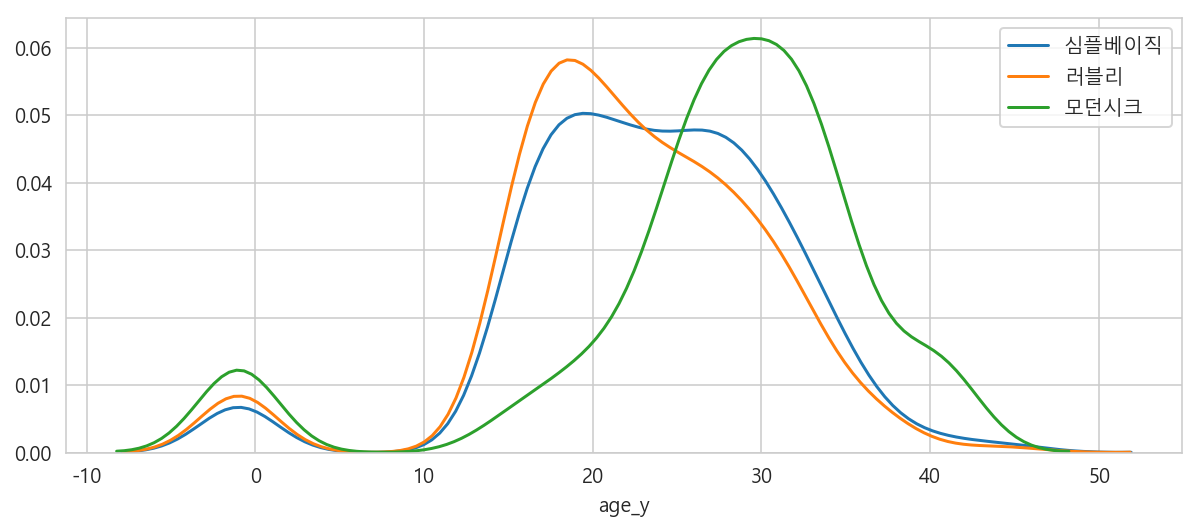

In [145]:
plt.figure(figsize=[10,4])

sns.distplot(merged.loc[merged['심플베이직'] == True, 'age_y'], label = '심플베이직', hist=False)
sns.distplot(merged.loc[merged['러블리'] == True, 'age_y'], label = '러블리', hist=False)
sns.distplot(merged.loc[merged['모던시크'] == True, 'age_y'], label = '모던시크', hist=False)

#### 11. DB에서 로그 데이터를 불러온 다음 timestamp 컬럼을 datetime 형식으로 바꾸고. user id를 자연수 형태로 변환

In [146]:
query = "SELECT * FROM 'log'"

log = pd.read_sql(query, connect)
log.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN


In [188]:
log['timestamp'] = pd.to_datetime(log['timestamp'])

기존의 고객 아이디와 새롭게 만들 고객 아이디를 짝지어 딕셔너리로 만들고 이를 mapping하여 진행

In [191]:
log["user_id"].value_counts()

7NWBks82J4_XnDpw8fu3y3fZFRVRATmr    231
ApFi4Hl0qdkRHzQ3W6qbrndB8vfEY_3f    189
Q3b6sc9u8wQp9D8N8QP5sKW5zAY_aM2E    180
CiShnjZZLMl-FUQ854x2i94LoEfaSqJd    168
ll42voAX6Au1-_QfNg6Gci-WGVkX9eLt    167
PIoUukb7UNs6gglt_-3Z4iCVQGYMwH14    157
FxHPCRs9os_in3SZ0I7IvkNm1BHkDiM_    154
6OUwcnzrZ5pPJZ4y_VbasWbFxXEjEDiE    151
NHgZVnVmwJzjctCVEkj8HayXpL-golvE    151
4fPdsDyCWs27EfBGMhN5roiKFPrRK6VH    150
MRNFeS0sVveDbr_PGIlPqsXAyWaPxBaK    148
erAB6EyczR7hbUbT_lTvojp9OYbEAOaH    144
dcOJ18dH3FKRVYxkZ-53m-mO6n2Za97n    139
PpakwhWqlIrFeh-XQETMYu38gC40N444    134
pyT5ZWM5rWtOrGH4gO4LXTojyni3Mj5p    134
AFL7yFVT0YRRJBeTBTptP-0r2vrQZ8fH    134
wpfx5PGFVHOh-lvqT7nTTJk5q3S08ALI    134
KV7mAuEkv-mP8D4Hfji8JD5g3-JuXAlB    132
bNlfVXmpz--AOmVxBvaT1PgUG3Az1gW5    119
KjGwxnm5R_pyit-qwbi1ELJrZsH2phBw    116
t9M7Wcoby9dBmEhGtfgBdh6FlnTJ6Rbe    115
0HxrF9vnFhT-1HREcMRGTfgKb0gWFzxo    113
hZrcB-RV5EqL94ysDGcrQ1TZKlhSeS7L    111
y-aaTfitv9QXrNIUBqrV-lpfAse46z3x    110
i1URxBsaUXc95uL-mDSlADNgXA6XTBAn    110


In [192]:
user_id = user["user_id"].unique()
user_id

array(['--PYPMX8QWg0ioT5zfORmU-S5Lln0lot',
       '-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv',
       '-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN', ...,
       'zz-aNy7UWfvyrZxO4Fs4K5ewmqZVaMOs',
       'zznj-LHhddVvuzZmbZpw6MSylLO64982',
       'zzxBQ7i7mttX0cv1GqFuuMstg7keEkdV'], dtype=object)

In [193]:
# 자연수 정수를 만들기
n_user_id = range(user["user_id"].size)
n_user_id

range(0, 10000)

In [194]:
# 기존의 id와 새로운 id를 묶기
id_zip = zip(user_id, n_user_id)

#id_zip을 출력하면 zip object이 출력
print(id_zip)

In [195]:
#zip()의 결과를 구체적으로 보기 위하여 list로 변환
list(zip(user_id, n_user_id))[:5]

[('--PYPMX8QWg0ioT5zfORmU-S5Lln0lot', 0),
 ('-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv', 1),
 ('-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN', 2),
 ('-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1', 3),
 ('-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k', 4)]

In [196]:
#새로운 id와 기존의 id가 대응된 딕셔너리 타입 변수를 생성
id_dict = dict(id_zip)

id_dict

{'--PYPMX8QWg0ioT5zfORmU-S5Lln0lot': 0,
 '-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv': 1,
 '-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN': 2,
 '-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1': 3,
 '-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k': 4,
 '-3fmY1WsLkYJwN_8lZQMmxZd6zJTAcT1': 5,
 '-3q-oynqxFEgSHUwX802hpmi1louyQNv': 6,
 '-428TMckUlhn6ptxN7gR2FGaSyXjSnaD': 7,
 '-4O8WnD8dT6nWho-4KbIm6TvnK4BmjX_': 8,
 '-4ltLPS55n6J2wSUCLxEZwxYdeW37cK5': 9,
 '-5BA0EwkyhGLCC8FxzvvDgyrZWYJM33I': 10,
 '-5Cwn2Fcx9j16QSM2-SLiaLMm0sS4E2I': 11,
 '-5o3lkvJctT3uURb5JWPVxe1VjqhyzAi': 12,
 '-622WUNWBtjX5VGKx8UnOtn2NVHD_NaB': 13,
 '-62U2A3KHjNZ2XXmOgQTSWEfPg1RRWWy': 14,
 '-63J8veARgGL3ulnRKblm4xhhwkvjKzG': 15,
 '-6UZWGgl3AAI7Df2sVWLX6oT6zP43zo0': 16,
 '-6jxyh56lSivkbLm3WNGRCmdyrdsBmNW': 17,
 '-71z4lG_D-eKnOmDCJlUaNvVcwd808yw': 18,
 '-75tFsDSoUwapUvwCUHTZiGTGkaSDleQ': 19,
 '-7SKUZkBmbG2ZMvJ0E0jmMDcd8PgmARb': 20,
 '-7uBbvfy4gff6mHV9XotjVO2YlCY2r8v': 21,
 '-8htVW7UIA8qRupSdCx-6PzIXLI_vk2p': 22,
 '-9qbSavSdufdw9JwmiWX1_URT2E2QxFZ': 23,
 '-Ae6T8G5uAZldwUEOTMR-KzG

In [197]:
# data_logs, order, user에 id_idct를 mapping하여 각 데이터 프레임에 새로운 고객 id컬럼인 n_user_id를 만들기

log["n_user_id"] = log["user_id"].map(id_dict)
order["n_user_id"] = order["user_id"].map(id_dict)
user["n_user_id"] = user["user_id"].map(id_dict)

# 결과를 확인합니다.
log[['user_id', 'n_user_id']].head()

,user_id,n_user_id
0,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3314
1,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,7844
2,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,7920
3,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3314
4,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,5608


#### 12. 주문 데이터, 로그 데이터를 concat

In [198]:
#주문 데이터의 첫번째 row를 출력
order.iloc[0]

timestamp          2018-06-11 00:00:43.032000
user_id      bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx
goods_id                                 1414
shop_id                                    38
price                                   45000
hour                                        0
n_user_id                                6241
Name: 0, dtype: object

In [199]:
# 위의 user_id에 해당하는 고객의 log기록
log.loc[log["user_id"] == "bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx"]

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id
878,2018-06-11 00:06:45.357,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6241
901,2018-06-11 00:06:54.034,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1062,2018-06-11 00:08:00.579,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,2048.0,46.0,6241
1259,2018-06-11 00:09:38.881,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1439,2018-06-11 00:11:04.446,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,3486.0,38.0,6241
1473,2018-06-11 00:11:20.354,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1526,2018-06-11 00:11:48.284,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,4006.0,24.0,6241
2423,2018-06-11 00:18:21.906,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
2529,2018-06-11 00:19:01.928,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6241
2758,2018-06-11 00:20:30.432,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,shops_bookmark,app_page_view,NaN,NaN,6241


로그 데이터와 주문 데이터에 동시에 기록된 고객을 찾기

In [200]:
# set()을 사용하여 user_id컬럼을 집합 타입으로 변환후 원소 개수를 반환하여 변수에 저장
user_set = set(order['user_id'])
user_number_order = len(user_set)

# log에 기록된 고객의 수를 user_number_log란 변수에 저장
log_set = set(log['user_id'])
user_number_log = len(log_set)


# 중복된 고객들을 user_duplicated란 변수에 저장
user_duplicated = user_set & log_set

print('해당 날짜에 구매한 총 고객수 입니다 :',user_number_order, end ='명\n')
print('해당 날짜 log데이터에 기록된 총 고객수입니다 :',user_number_log,  end ='명\n')
print('중복되는 고객수입니다 :', len(user_duplicated) , end ='명\n')

해당 날짜에 구매한 총 고객수 입니다 : 832명
해당 날짜 log데이터에 기록된 총 고객수입니다 : 9909명
중복되는 고객수입니다 : 742명


주문데이터와 로그데이터를 concat하기 위해 column명을 동일하게 맞추기

In [201]:
print(order.columns)
print(log.columns)

Index(['timestamp', 'user_id', 'goods_id', 'shop_id', 'price', 'hour',
       'n_user_id'],
      dtype='object')
Index(['timestamp', 'user_id', 'event_origin', 'event_name', 'event_goods_id',
       'event_shop_id', 'n_user_id'],
      dtype='object')


data_logs의 columns을 기준으로 병합

In [202]:
# order 원본을 변형하지 않기 위해 order을 copy하여 사용
order_copy = order.copy()

In [203]:
# 겹치는 유저만으로 data를 indexing
order_copy = order_copy[order_copy['user_id'].isin(user_duplicated)]

#  event_origin 컬럼에는 shop_id 컬럼을 저장
order_copy['event_origin'] = order_copy['shop_id']

#  event_name 컬럼에는 'purchase'를 저장
order_copy['event_name'] = 'purchase'

# event_goods_id 컬럼에는 good_id 컬럼를 저장
order_copy['event_goods_id'] = order_copy['goods_id']

# 사용할 columns를 설정
order_copy = order_copy[['timestamp', 'n_user_id', 'user_id','event_origin',
         'event_name', 'event_goods_id', 'price']]

order_copy.head()

,timestamp,n_user_id,user_id,event_origin,event_name,event_goods_id,price
0,2018-06-11 00:00:43.032,6241,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,38,purchase,1414,45000
1,2018-06-11 00:02:33.763,8899,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,12,purchase,1351,9500
4,2018-06-11 00:05:26.010,7832,lq1Je3voA3a0MouSFba3629lKCvweI24,89,purchase,5572,29000
5,2018-06-11 00:05:35.182,2745,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,22,purchase,55,11200
6,2018-06-11 00:06:14.314,7800,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,22,purchase,2451,19800


In [204]:
# log, order_copy를 concat 하고 og_order에 저장
log_order = pd.concat([log, order_copy], sort = False)

log_order.shape

(106587, 8)

In [205]:
# log_order에 구매기록여부 컬럼인 purchase 컬럼을 만들기
log_order['purchase'] = log_order["price"].notnull()

log_order.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id,price,purchase
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN,3314,NaN,False
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN,7844,NaN,False
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN,7920,NaN,False
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN,3314,NaN,False
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN,5608,NaN,False


데이터를 파악하기 쉽게 하기 위해 user_id, timestamp 컬럼을 기준으로 log_order를 정렬

In [206]:
log_order = log_order.sort_values(by = ['user_id', 'timestamp']).reset_index(drop =True)

log_order.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id,price,purchase
0,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,0,NaN,False
1,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,0,NaN,False
2,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1,NaN,False
3,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,enter_browser,2506.0,40.0,1,NaN,False
4,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1,NaN,False


#### 13. 동일한 사용자에 대한 연속한 로그들 사이의 시간 간격을 구하기

timestamp_after 컬럼은 다음 log의 timestamp값을 가진다.

고객별로 groupby()한 뒤 shift(-1)을 적용한 결과를 timestamp_afterdp 저장

groupby를 하고 shift를 하면 고객의 당일 마지막 로그의 timestamp_after은 NaT(Not a Time)값을 갖게 됨

In [207]:
log_order["timestamp"] = pd.to_datetime(log_order["timestamp"])
log_order["timestamp"].head()

0   2018-06-11 15:57:10.615
1   2018-06-11 15:59:05.505
2   2018-06-11 00:55:37.309
3   2018-06-11 00:55:44.430
4   2018-06-11 01:00:33.295
Name: timestamp, dtype: datetime64[ns]

In [208]:
log_order['timestamp_after'] = log_order.groupby(['n_user_id'])['timestamp'].shift(-1)

log_order.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id,price,purchase,timestamp_after
0,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,0,NaN,False,2018-06-11 15:59:05.505
1,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,0,NaN,False,NaT
2,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1,NaN,False,2018-06-11 00:55:44.430
3,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,enter_browser,2506.0,40.0,1,NaN,False,2018-06-11 01:00:33.295
4,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1,NaN,False,2018-06-11 01:11:03.608


log_duration을 계산하고 nan값(마지막 로그)는 0으로 채워 log_duration 컬럼에 저장

In [209]:
log_order['page_duration'] = (log_order['timestamp_after'] - log_order['timestamp']).fillna(0)

log_order[['timestamp','timestamp_after','page_duration']].head()

C:\Users\jjcor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  """Entry point for launching an IPython kernel.


,timestamp,timestamp_after,page_duration
0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,00:01:54.890000
1,2018-06-11 15:59:05.505,NaT,00:00:00
2,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,00:00:07.121000
3,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,00:04:48.865000
4,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,00:10:30.313000


분석의 편의를 위하여 map()과 total_seconds() 메서드를 이용하여 log_duration을 초로 환산

log_duration 컬럼을 float으로 변환

In [210]:
log_order['page_duration'] = log_order['page_duration'].map(lambda x: x.total_seconds()).astype('float') 

log_order[['n_user_id','timestamp', 'timestamp_after', 'page_duration']].head()

,n_user_id,timestamp,timestamp_after,page_duration
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890
1,0,2018-06-11 15:59:05.505,NaT,0.000
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313


#### 14. session 구하기

1. page_duration이 0이면 고객의 당일 마지막 log
2. page_duration이 40분이상이면 고객이 한 session을 종료

In [166]:
# 30분을 초로 환산
log_order["is_out"] = (log_order["page_duration"] > 2400) | (log_order["page_duration"] == 0 )

log_order[['n_user_id','timestamp', 'timestamp_after', 'page_duration', 'is_out']].head()

,n_user_id,timestamp,timestamp_after,page_duration,is_out
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,0,2018-06-11 15:59:05.505,NaT,0.000,True
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False


page_duration이 2400(40분)이상 또는 0인 log들은 session의 마지막 log

예를 들어, page_duration이 36000인 log가 있으면 이는 10시간 뒤에 다시 app에 접속한다는 것을 의미하는 것이지 실제 10시간 동안 앱을 사용했다는 의미가 아님

따라서 이 사람에 대한 해당 log는 해당 session의 마지막 log가 되고 다음 log는 10시간 뒤인 다음 session의 첫 log가 됨

is_out이 True인 log들, 즉 session의 마지막 log들의 page_duration은 0이 되도록 변환

is_out 컬럼이 True인 page_duration을 0으로 지정

In [167]:
log_order.loc[log_order['is_out'], 'page_duration'] = 0

log_order[['n_user_id','timestamp', 'timestamp_after', 'page_duration', 'is_out']].head(20)

,n_user_id,timestamp,timestamp_after,page_duration,is_out
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,0,2018-06-11 15:59:05.505,NaT,0.000,True
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False
8,1,2018-06-11 01:12:28.850,NaT,0.000,True
9,2,2018-06-11 23:19:11.439,2018-06-11 02:21:04.848,-75486.591,False


이제 session을 구하여 번호를 부여

번호는 session별 고유 번호(session_idx_unique)와 일(day)마다 0부터 시작하는 daily session 번호(session_idx_daily)를 부여

In [168]:
log_order['is_out-cumsum()'] = log_order['is_out'].cumsum()
log_order["is_out-cumsum()-shift(1)"] = log_order['is_out-cumsum()'].shift(1)
log_order["is_out-cumsum()-shift(1)-fillna(0)"] = log_order["is_out-cumsum()-shift(1)"].fillna(0)
log_order["is_out-cumsum()-shift(1)-fillna(0)-astype(int)"] = log_order["is_out-cumsum()-shift(1)-fillna(0)"].astype(int)

# cumsum() 컬럼의 누적 합계를 반환합니다.
log_order['session_idx_unique'] = (log_order['is_out'].cumsum().shift(1).fillna(0).astype(int))

log_order[['n_user_id','timestamp', 'timestamp_after', 'page_duration', 'is_out','is_out','is_out-cumsum()','is_out-cumsum()-shift(1)', 'is_out-cumsum()-shift(1)-fillna(0)','is_out-cumsum()-shift(1)-fillna(0)-astype(int)','session_idx_unique']].head(30)

,n_user_id,timestamp,timestamp_after,page_duration,is_out,is_out,is_out-cumsum(),is_out-cumsum()-shift(1),is_out-cumsum()-shift(1)-fillna(0),is_out-cumsum()-shift(1)-fillna(0)-astype(int),session_idx_unique
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,False,0,NaN,0.0,0,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,True,1,0.0,0.0,0,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,False,1,1.0,1.0,1,1
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,False,1,1.0,1.0,1,1
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,False,1,1.0,1.0,1,1
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,False,1,1.0,1.0,1,1
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,False,1,1.0,1.0,1,1
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,False,1,1.0,1.0,1,1
8,1,2018-06-11 01:12:28.850,NaT,0.000,True,True,2,1.0,1.0,1,1
9,2,2018-06-11 23:19:11.439,2018-06-11 02:21:04.848,-75486.591,False,False,2,2.0,2.0,2,2


 daily session 번호를 부여

In [169]:
log_order.groupby('n_user_id')['is_out'].shift(1)

0           NaN
1         False
2           NaN
3         False
4         False
5         False
6         False
7         False
8         False
9           NaN
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23         True
24        False
25        False
26        False
27         True
28        False
29        False
30        False
31        False
32        False
33        False
34        False
35        False
36        False
37        False
38        False
39        False
40        False
41        False
42        False
43        False
44        False
45        False
46        False
47        False
48        False
49        False
50        False
51        False
52        False
53        False
54        False
55        False
56        False
57          NaN
58         True
59        False
60        False
61        False
62      

In [170]:
log_order['is_out-cumsum()'] = log_order.groupby('n_user_id')['is_out'].cumsum()
log_order["is_out-cumsum()-shift(1)"] = log_order.groupby('n_user_id')['is_out'].cumsum().shift(1)
log_order["is_out-cumsum()-shift(1)-fillna(0)"] = log_order.groupby('n_user_id')['is_out'].cumsum().shift(1).fillna(0)
log_order["is_out-cumsum()-shift(1)-fillna(0)-astype(int)"] = log_order.groupby('n_user_id')['is_out'].cumsum().shift(1).fillna(0).astype(int)



log_order['session_idx_daily'] = (log_order.groupby('n_user_id')['is_out'].cumsum().shift(1).fillna(0).astype(int))

# user마다 첫 session_idx_daily가 1로 되어있기 때문에 이를 0으로 바꿔줌
head_index = log_order.groupby('n_user_id')['session_idx_daily'].head(1).index
log_order.loc[head_index, 'session_idx_daily'] = 0

log_order[['n_user_id','timestamp', 'timestamp_after', 'page_duration','is_out','is_out-cumsum()','is_out-cumsum()-shift(1)', 'is_out-cumsum()-shift(1)-fillna(0)','is_out-cumsum()-shift(1)-fillna(0)-astype(int)','session_idx_daily']].head(30)

,n_user_id,timestamp,timestamp_after,page_duration,is_out,is_out-cumsum(),is_out-cumsum()-shift(1),is_out-cumsum()-shift(1)-fillna(0),is_out-cumsum()-shift(1)-fillna(0)-astype(int),session_idx_daily
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0.0,NaN,0.0,0,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,1.0,0.0,0.0,0,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,0.0,1.0,1.0,1,0
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,0.0,0.0,0.0,0,0
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,0.0,0.0,0.0,0,0
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,0.0,0.0,0.0,0,0
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,0.0,0.0,0.0,0,0
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,0.0,0.0,0.0,0,0
8,1,2018-06-11 01:12:28.850,NaT,0.000,True,1.0,0.0,0.0,0,0
9,2,2018-06-11 23:19:11.439,2018-06-11 02:21:04.848,-75486.591,False,0.0,1.0,1.0,1,0


#### 14.1) session별 log 수(접속별 활동 개수)

이제 session을 이용한 분석

**session별 log 수(접속별 활동 개수)**, **user별 session당 평균 log수(고객별 접속당 평균 활동수)** 구하기

In [178]:
# size() 그룹별 속한 row 수(log 수)를 반환합니다.
# reset_index() index를 초기화합니다.
session_log_count = (log_order.groupby(['n_user_id', 'session_idx_daily']).size().reset_index().rename(columns = { 0 : "log_count"} ))

session_log_count.head(5)

,n_user_id,session_idx_daily,log_count
0,0,0,2
1,1,0,7
2,2,0,14
3,2,1,4
4,2,2,30


#### 14.2) user별 session당 평균 log수의 평균(고객별 접속당 평균 활동수)**

In [173]:
session_user_log_count = (session_log_count.groupby('n_user_id')['log_count'].mean().reset_index().rename(columns = {'log_count' : 'log_count_mean'}))

session_user_log_count.head(20)

,n_user_id,log_count_mean
0,0,2.000000
1,1,7.000000
2,2,16.000000
3,3,7.750000
4,4,2.000000
5,5,1.000000
6,6,9.000000
7,7,3.000000
8,8,16.500000
9,9,14.000000


In [174]:
# 접속별 평균 활동수가 가장 많은 상위 5명의 user를 구하기
session_user_log_count.sort_values(by = 'log_count_mean').tail()

,n_user_id,log_count_mean
6927,6988,69.0
4181,4215,81.0
6085,6140,81.0
1421,1435,97.0
1123,1135,151.0


14.3) 하루동안 가장 많은 session을 갖는(가장 많이 활동한) 상위 5명의 user

In [175]:
(log_order.groupby(["n_user_id"])['session_idx_daily'].nunique().sort_values().tail())

n_user_id
8347     9
4231     9
6010    10
2249    10
5847    11
Name: session_idx_daily, dtype: int64

#### 15. 잔존시간을 구하기

1. user별
2. 구매 user/ 비구매 user

#### 15.1) user별 잔존시간

1. session별 잔존시간 구하기.
2. session별 잔존시간을 바탕으로 user별 잔존시간 구하기

In [185]:
duration_session = (log_order
                        .groupby(['n_user_id', 'session_idx_daily'])['page_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'page_duration' : 'duration'}))

duration_session.head(10)

,n_user_id,session_idx_daily,duration
0,0,0,114.890
1,1,0,1011.541
2,2,0,-74592.849
3,2,1,69.618
4,2,2,2899.193
5,3,0,0.000
6,3,1,45.911
7,3,2,85.183
8,3,3,1711.031
9,4,0,49.130


duration_session을 이용하여 user별 잔존시간 구하기

In [177]:
duration_user = duration_session.groupby("n_user_id")['duration'].mean()

duration_user.to_frame().head()

,duration
n_user_id,
0,114.890000
1,1011.541000
2,-23874.679333
3,460.531250
4,49.130000


잔존 시간이 0은 아무것도 안한것, 제외하고 계산

#### 15.2) 구매/비구매 session별 평균 잔존시간 구하기**

구매 기록이 있는 session은 잔존시간이 길 것이라고 예상가능

구매기록이 있는 session list를 만들기

In [179]:
session_purchase = log_order.loc[log_order['purchase']==True, 'session_idx_unique'].unique()

session_purchase

array([    2,    14,    15,    20,    85,    93,   120,   167,   192,
         233,   235,   338,   393,   396,   417,   427,   437,   492,
         501,   515,   555,   566,   590,   613,   625,   632,   682,
         706,   709,   727,   742,   757,   784,   793,   802,   819,
         831,   854,   861,   872,   944,  1009,  1021,  1054,  1087,
        1093,  1136,  1144,  1184,  1211,  1231,  1261,  1284,  1285,
        1291,  1326,  1332,  1385,  1387,  1406,  1415,  1424,  1457,
        1462,  1538,  1541,  1597,  1625,  1657,  1719,  1737,  1758,
        1765,  1766,  1772,  1798,  1803,  1804,  1807,  1809,  1835,
        1917,  1919,  1929,  1954,  1965,  2028,  2029,  2039,  2063,
        2073,  2095,  2105,  2114,  2162,  2196,  2211,  2240,  2256,
        2267,  2284,  2291,  2297,  2315,  2324,  2342,  2346,  2407,
        2433,  2443,  2468,  2470,  2512,  2548,  2553,  2567,  2575,
        2587,  2593,  2666,  2702,  2712,  2714,  2724,  2737,  2748,
        2755,  2846,

data_purchase 변수에는 구매 기록이 있는 session들의 데이터를,

data_npurchase 변수에는 구매 기록이 없는 session들의 데이터를 저장

In [181]:
data_purchase = log_order.loc[log_order['session_idx_unique'].isin(session_purchase)]
data_npurchase = log_order.loc[~log_order['session_idx_unique'].isin(session_purchase)]

data_purchase를 이용하여 구매 session의 잔존시간을 구하기

In [182]:
purchase_session_duration = (data_purchase.groupby(['n_user_id', 'session_idx_unique'])['page_duration'].sum().reset_index().rename(columns = {"page_duration" : 'session_duration'}))

purchase_session_duration.head(10)

,n_user_id,session_idx_unique,session_duration
0,2,2,-74592.849
1,8,14,0.000
2,8,15,-32140.302
3,9,20,125.171
4,47,85,-44811.262
5,49,93,2615.611
6,65,120,-41493.185
7,86,167,-9358.940
8,97,192,-7976.980
9,117,233,297.708


비구매 session의 잔존시간을 구해주세요.

In [183]:
npurchase_session_duration = (data_npurchase.groupby(['n_user_id', 'session_idx_unique'])['page_duration'].sum().reset_index().rename(columns = {"page_duration" : 'session_duration'}))

npurchase_session_duration.head(10)

,n_user_id,session_idx_unique,session_duration
0,0,0,114.890
1,1,1,1011.541
2,2,3,69.618
3,2,4,2899.193
4,3,5,0.000
5,3,6,45.911
6,3,7,85.183
7,3,8,1711.031
8,4,9,49.130
9,5,10,0.000


구매/비구매 session의 잔존 시간으로 boxplot을 그려그리기

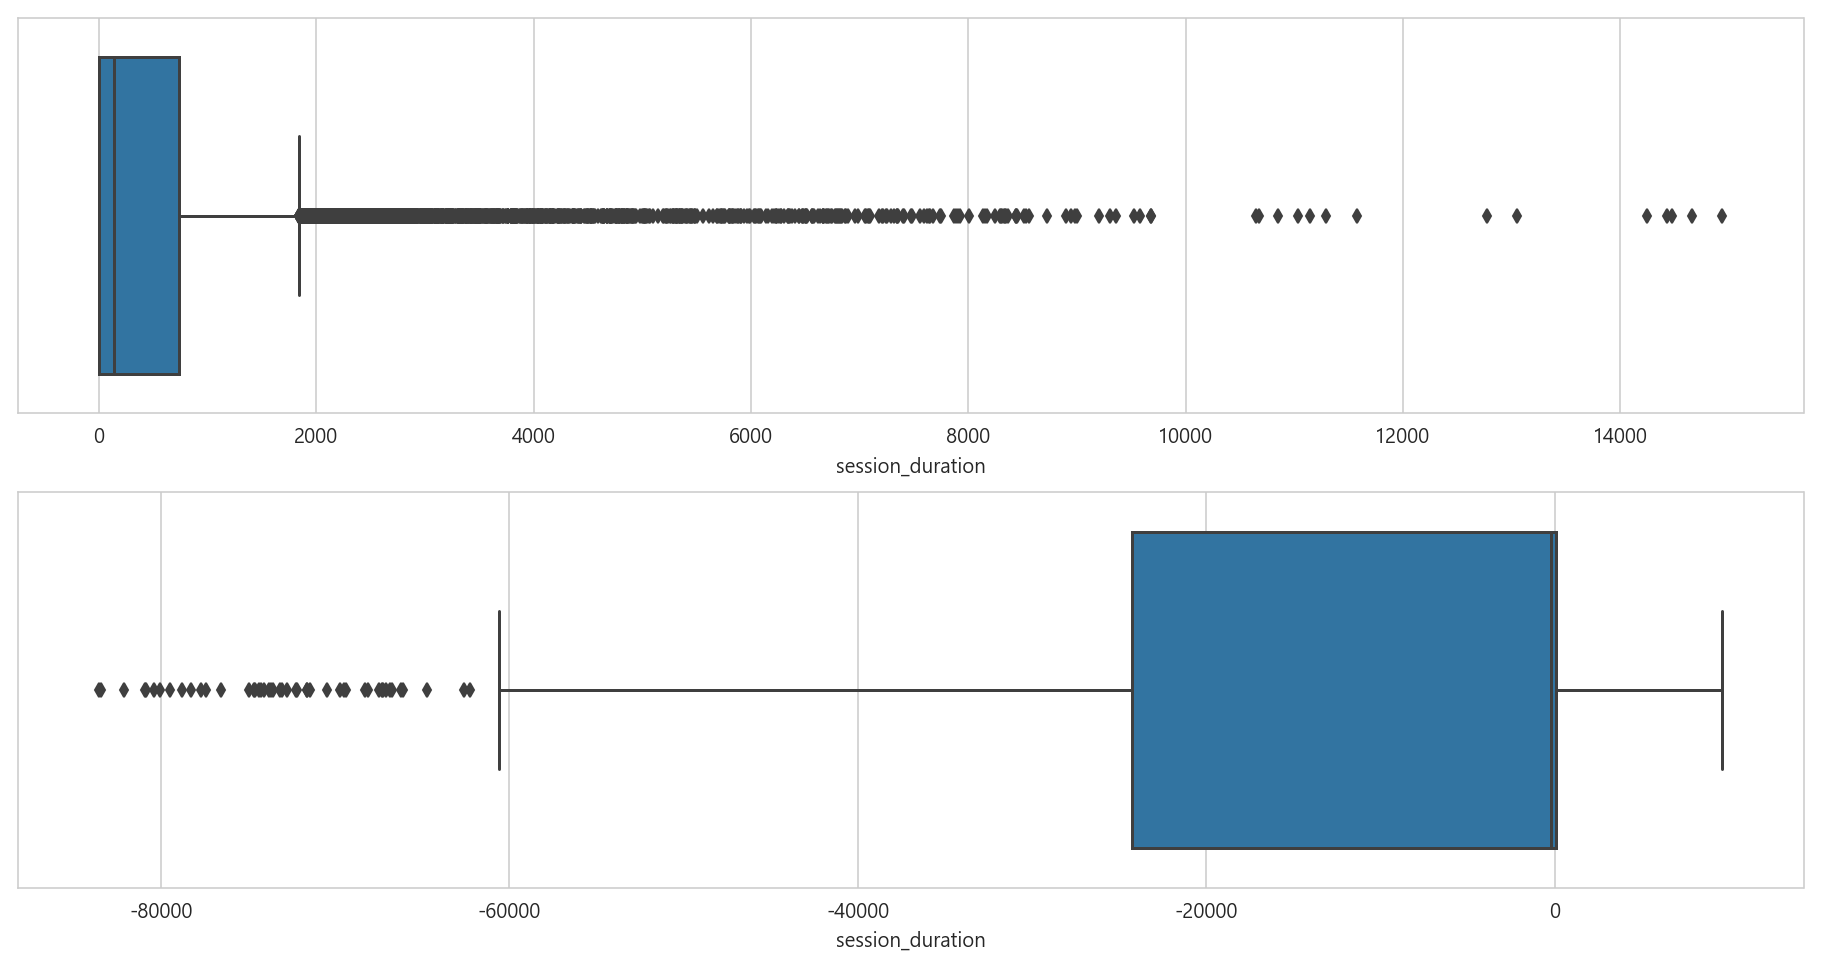

In [184]:
figure, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)

figure.set_size_inches(16,8)

sns.boxplot(data = npurchase_session_duration, x = "session_duration", ax = ax1)
sns.boxplot(data = purchase_session_duration, x = "session_duration", ax = ax2)

## 제출

과제를 다 끝내셨으면, datascience@dsschool.co.kr 로 제출해주시면 솔루션과 검토 결과를 드립니다. 과제를 제출하지 않으시더라도 솔루션은 다음 수업 시간에 제공해드립니다. 메일의 제목은 `[분석반 O기 O주차 과제 제출] 홍길동`과 같이 해주시면 감사하겠습니다. 

아직 슬랙(Slack)에 가입하지 않으셨다면 슬랙에 가입해주세요. 슬랙 링크는 http://bit.ly/slack-ds 입니다. 해당 링크에서 가입하신 후 왼쪽의 #open-lobby 채널에서 "실전 데이터 분석반 (기수)기 (성함)입니다."라고 적어주시면 기수에 맞는 채널에 초대해 드리겠습니다.


수업이나 과제 관련 질문, 기타 기수 변경, 수료증 문의는 담당 조교에서 문의 주시고 영수증 발급 등의 문의는 support@dsschool.co.kr 로 메일주시면 감사하겠습니다.


